In [92]:
import math
import json
import folium
import seaborn as sns

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import utils

from scipy import stats
from scipy.stats import skew
from scipy.stats import normaltest
from missingno import matrix as missing
from summarytools import dfSummary as summary

# Read the CSV file into a DataFrame
property_sales_data = pd.read_csv('real_estate_dataset.csv', low_memory=False)

# Display the first 5 rows of the DataFrame
property_sales_data.head()

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

%matplotlib inline
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['figure.dpi'] = 144

sns.set()

In [93]:
# Read the CSV file into a DataFrame
property_sales_data = pd.read_csv('real_estate_dataset.csv', low_memory=False)

# Display the first 5 rows of the DataFrame
property_sales_data.head()

,PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,98461,Manufacturing,30131000,9434-9446 N 107TH ST,NaN,9.0,6300.0,Service Building,Concrete Block,1.0,1978.0,NaN,20600.0,6,NaN,0,0,0.0,4/1/2022,950000.0
1,98464,Commercial,30152000,9306-9316 N 107TH ST,NaN,9.0,6202.0,Office Building - 1 Story,Brick,1.0,1982.0,NaN,9688.0,23,NaN,0,0,35719.0,10/7/2022,385000.0
2,98508,Residential,49980110,9327 N SWAN RD,NaN,9.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0,1341648.0,1/7/2022,800000.0
3,98519,Residential,49993200,9411 W COUNTY LINE RD,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1959.0,6.0,1334.0,1,3.0,1,1,83200.0,8/9/2022,280000.0
4,98561,Residential,50042000,9322 N JOYCE AV,NaN,9.0,40.0,Ranch,Aluminum/Vinyl,1.0,1980.0,10.0,1006.0,1,6.0,1,0,8303.0,5/23/2022,233100.0


In [94]:
summary(property_sales_data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,PropertyID[int64],Mean (sd) : 619344.5 (329743.8)min < med < max:98461.0 < 855489.0 < 881476.0IQR (CV) : 657061.0 (1.9),"19,883 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAOwAAABcCAYAAABtGVlhAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAddJREFUeJzt3MFt6kAUQFEcZUkbkSjAdOE0kNroIu4iLoQu/EUFHyRb5JJzFrAZjWbB9QCLN6zregAa3p59AOB+goWQ92cfACqGYfjca+91Xb/vWSdYeMA4jufDxpZl+bl3rWDhQdM03R3Y/8zz/NADwG9YCBEshAgWQgQLIYKFEMFCiGAhRLAQIlgIESyECBZCBAshgoUQwUKIYCFEsBAiWAgRLIQIFkIECyGChRDBQohgIUSwECJYCBEshAgWQgQLIYKFEMFCiGAhRLAQIlgIESyECBZCBAshgoUQwUKIYCFEsBAiWAgRLIQIFkIECyGChRDBQohgIUSwECJYCBEshAgWQgQLIYKFEMFCiGAhRLAQIlgIESyECBZCBAshgoWQ93sXDsPwudch1nX93mtv+JPB3ozjeN76AMuy/Gy9J7yqh4K9maZps8Aul8vX7X0YhsMe3Nwc/nqwWzudTh/H43Hzfd3cvKKnB7v1rX0zz/PmX93hN/AvMYQIFkIECyGChRDBQohgIUSwECJYCBEshAgWQgQLIYKFEMFCiGAhRLAQIlgIESyE/IqJE1u7Xq8fe82KMieKZ3rJYPeaFWVOFLlg95iXFJrBdN5rwiMJ59vLMz+v/wB4AjkrwkepTgAAAABJRU5ErkJggg=="">",0(0.0%)
2,PropType[object],1. Residential2. Condominium3. Lg Apartment4. Commercial5. Manufacturing6. Exempt,"16,280 (81.4%)2,592 (13.0%)595 (3.0%)526 (2.6%)10 (0.0%)5 (0.0%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAN8AAADHCAYAAACZfIbaAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAArtJREFUeJzt3TFOAzEUQEFvlCOFW4TTkluQOxkhaiQKluddZoq02ebJsi35b3POAfy9S/CfgPigIz6IiA8i4oOI+CCyjTFeqz+HPc0538bCrrfb7aX+CPhtz+fzfSzu+vlzv9+X/1D4qcfjcYgFxZ4PIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4oHy38yjvHMKZeC6e05qLPxe/GQsNDXs+iIgPIuKD/3bgsvpmGE45n+8Is9PgdPP53CnCF3s+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyJGhEHEi9UQMSIMIvZ8EBEfRMQHqx64OBiBYESYUV4QjAhz9wf7sueDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4IGJEGES8WA0RI8IgYs8HEfFBRHyw4oGLwxYIRoQZDwbBiDD3frA/ez6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIuKDiPggIj6IiA8i4oOI+CAiPoiIDyLig4j4ICI+iIgPIkaEQcSL1RAxIgwi9nwQER9ExAcR8UFEfBC5bNv27VUDsB8rH0TEBxHxQUR8EBEfRMQHEfFBRHwQER9ExAcR8UFEfBARH0TEBxHxQUR8EBEfRMQHEfFBRHwQER9ExAcR8UFEfBAxIgwiVj6IiA8i4oOI+CAiPogYEQYRKx9ExAcR8UFEfBARH0TEBxHxQUR8EBEfRMQHEfFBRHwQER9ExAcR8UFEfBARH0TEBxHxQUR8EBEfRMQHEfFBRHwQMSIMIlY+iIgPIuKDiPggIj6IiA8i4oOI+GA0PgD7VWBPX9hFLwAAAABJRU5ErkJggg=="">",0(0.0%)
3,taxkey[int64],Mean (sd) : 3509043723.5 (1502019772.9)min < med < max:30131000.0 < 3250347500.0 < 7160379000.0IQR (CV) : 2490489750.0 (2.3),"19,025 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAOwAAABcCAYAAABtGVlhAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAWJQAAFiUBSVIk8AAAAlRJREFUeJzt3cFto0AYhmHPykfaiOQCnC6cBrY2d7F0se5gG3ABvhNxyHlBmtHwjZ/nHCFyeEOAf4ayLMsJyPCr9wkA2wkWgpx7n8C7K6V8tTr2six/Wh2bPgR7ANfr9bP2MR+Px9/ax6Q/wR7E7XarFtg8z9X/AHAM7mEhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiGAhiOV1/Reaf75er4/T6WT9Kv8l2M4LzZ/P5xorbCLYjgvNV/f7XbBs5h4WgrjC0pVN6PYRLN3ZhG47wXIINqHbxj0sBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBEsBBlyeV2jRdE2S6O7IYNtsSjaZmkcwbDB1l4UbbM0jsA9LAQRLAQRLAQRLAQRLAQRLAQRLAQZ+j3su/oZ8iilNDn+iJ/ASCHYQV0ul49pmqofd9RPYKQQ7MAafBrzd4MrtxntHQRL1yu3Ge19BMtuZrT78ZQYgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgggWgpwH/Mrcyi4GDOk82lfmVnYxYFTdg22095Bg39hz4F0jDxEs1HYZdNdIwTKsW+X/3OZ5rn77tpenxBBEsBBEsBBEsBDk3HnIwYADtHpKXHvIwYADNH6t4zMN0I/3sHCACaqt01OChc4TVHumpwQLHW8L905Pea0DQQQLQQQLQQQLQQQLQcqyLNt+sJSvFpNO6yPyaZr+Hf24zjXnXJ9Bv/9qfa2zdReLb4tqsCxr39zJAAAAAElFTkSuQmCC"">",0(0.0%)
4,Address[object],"1. 5815 N 37TH ST2. 3371 S 12TH ST3. 777 N PROSPECT AV, Unit MID T4. nan5. 10939 W CAMERON AV6. 1235-1237 S CESAR E CHAVEZ DR7. 3318 W BIRCHWOOD AV8. 3906 N 52ND ST9. 2657 N 55TH ST10. 8727 N 72ND ST11. other","9 (0.0%)8 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)4 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)3 (0.0%)19,963 (99.8%)","<img src = ""data:image/png;

In [95]:
property_sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PropertyID,20008.0,6.193445e+05,3.297438e+05,98461.0,2.110655e+05,8.554890e+05,8.681265e+05,8.814760e+05
taxkey,20008.0,3.509044e+09,1.502020e+09,30131000.0,2.450312e+09,3.250348e+09,4.940802e+09,7.160379e+09
District,20006.0,7.884385e+00,4.272109e+00,1.0,4.000000e+00,8.000000e+00,1.100000e+01,1.500000e+01
nbhd,19951.0,3.339903e+03,1.770248e+03,40.0,1.830000e+03,3.150000e+03,4.620000e+03,2.491000e+04
Stories,19905.0,1.369179e+00,5.402946e-01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,1.900000e+01
Year_Built,19974.0,1.936518e+03,1.093841e+02,0.0,1.922000e+03,1.949000e+03,1.958000e+03,2.022000e+03
Rooms,18944.0,6.882760e+00,3.244466e+00,0.0,5.000000e+00,6.000000e+00,8.000000e+00,6.300000e+01
FinishedSqft,19933.0,2.162681e+03,7.749029e+03,0.0,1.075000e+03,1.377000e+03,1.964000e+03,3.600000e+05
Units,20008.0,1.867503e+00,1.332310e+01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,7.810000e+02
Bdrms,18945.0,3.486461e+00,1.607178e+00,0.0,3.000000e+00,3.000000e+00,4.000000e+00,3.200000e+01


In [136]:
# First, check the extent of missing values
missing_values = property_sales_data.isnull().sum()
missing_percentages = (missing_values / len(property_sales_data)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentages
})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values('Percentage (%)', ascending=False)
print(missing_data)

                    Missing Values  Percentage (%)
CondoProject                 17422       87.075170
Extwall                       2699       13.489604
number_bedroom_bin            2694       13.464614
Rooms                         1064        5.317873
Bdrms                         1063        5.312875
Stories                        103        0.514794
FinishedSqft                    75        0.374850
Style                           68        0.339864
nbhd                            57        0.284886
livable_bin                     57        0.284886
Year_Built                      34        0.169932
Address                          4        0.019992
District                         2        0.009996
Lotsize                          1        0.004998


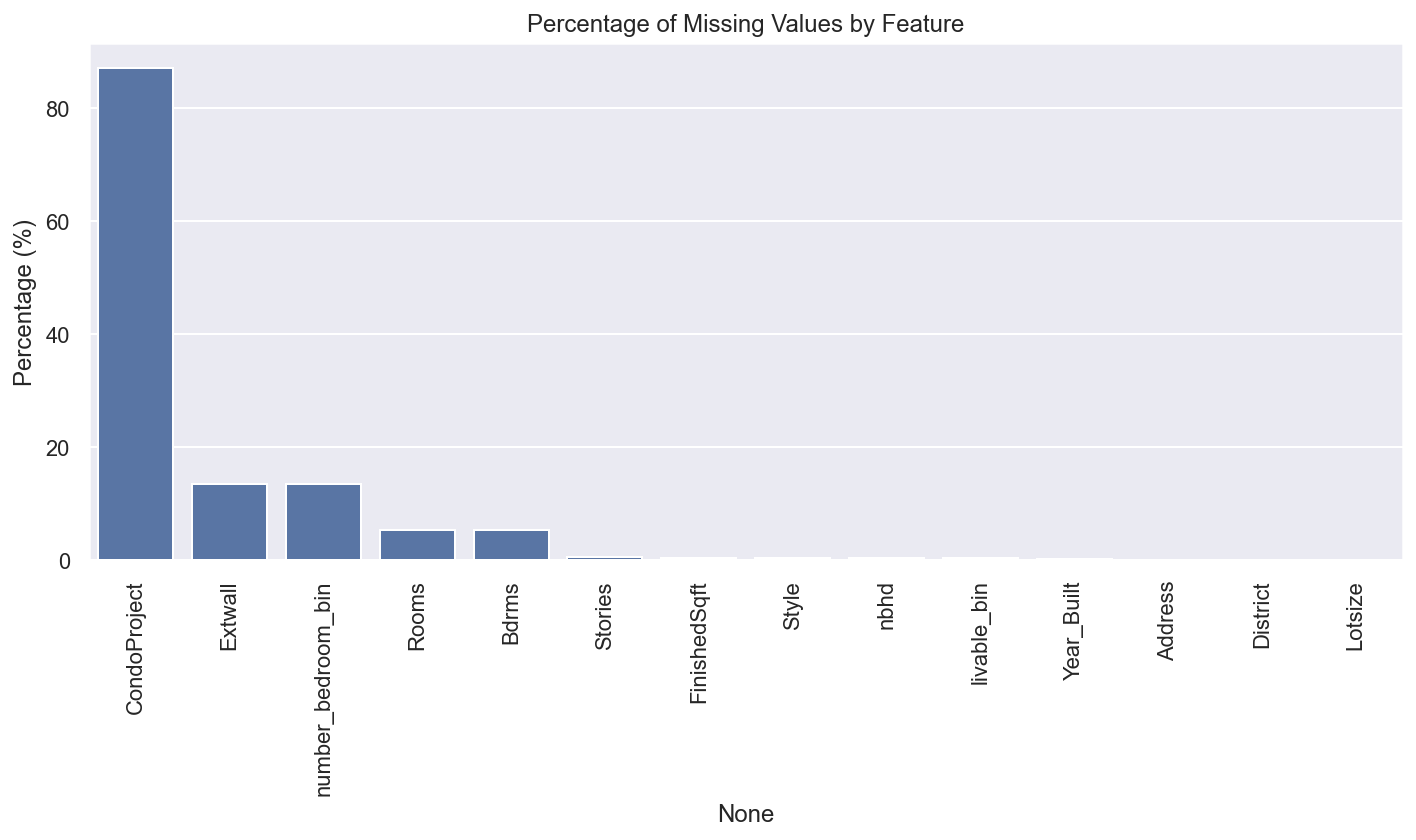

In [137]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y='Percentage (%)', data=missing_data)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Feature')
plt.tight_layout()
plt.show()

In [138]:
# Treatment strategy based on missing value percentage
for column in missing_data.index:
    missing_pct = missing_data.loc[column, 'Percentage (%)']
    
    if missing_pct > 30:
        # For columns with too many missing values, consider dropping
        print(f"Column {column} has {missing_pct:.2f}% missing values. Consider dropping this column.")
    
    elif column in numerical_features:
        # For numerical features, impute with median
        median_value = property_sales_data[column].median()
        property_sales_data[column].fillna(median_value, inplace=True)
        print(f"Imputed missing values in {column} with median: {median_value}")
        
    elif column in categorical_features:
        # For categorical features, impute with mode
        mode_value = property_sales_data[column].mode()[0]
        property_sales_data[column].fillna(mode_value, inplace=True)
        print(f"Imputed missing values in {column} with mode: {mode_value}")


Column CondoProject has 87.08% missing values. Consider dropping this column.
Imputed missing values in Extwall with mode: Aluminum/Vinyl
Imputed missing values in number_bedroom_bin with mode: 3-5
Imputed missing values in Rooms with median: 6.0
Imputed missing values in Bdrms with median: 3.0
Imputed missing values in Stories with median: 1.0
Imputed missing values in FinishedSqft with median: 1377.0
Imputed missing values in Style with mode: Ranch
Imputed missing values in nbhd with median: 3150.0
Imputed missing values in livable_bin with mode: 4
Imputed missing values in Year_Built with median: 1949.0
Imputed missing values in Address with mode: 5815 N 37TH ST
Imputed missing values in District with median: 8.0
Imputed missing values in Lotsize with median: 5040.0


In [139]:
# Verify that missing values have been addressed
assert property_sales_data.isnull().sum().sum() == 0, "There are still missing values in the dataset!"

AssertionError: There are still missing values in the dataset!

<Axes: >

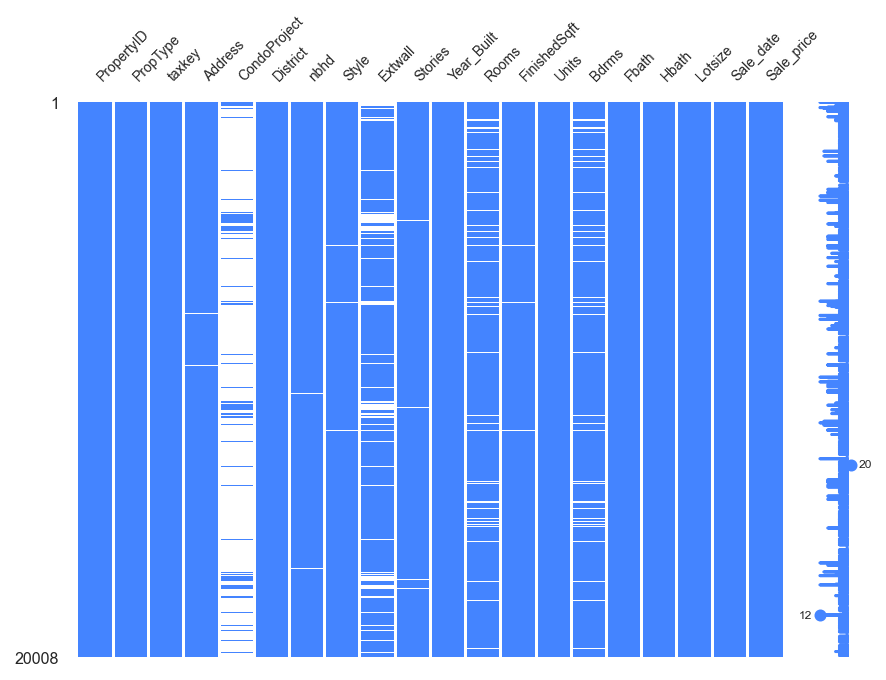

In [96]:
missing(property_sales_data, figsize=(7, 5), fontsize=7, color=(0.27, 0.52, 1.0))

In [97]:
property_sales_data['Sale_price'].describe()

count    2.000800e+04
mean     2.415009e+05
std      7.917556e+05
min      2.500000e+03
25%      1.235000e+05
50%      1.779000e+05
75%      2.440000e+05
max      7.042500e+07
Name: Sale_price, dtype: float64

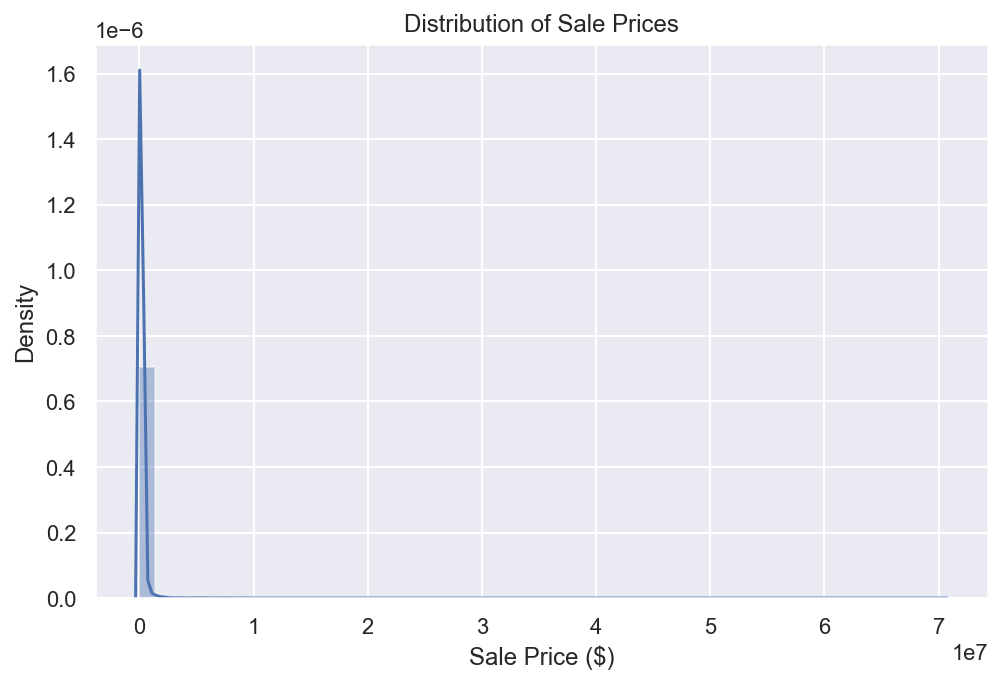

In [98]:
# visualize the distribution of sale prices
plt.figure(figsize=(8,5))
sns.distplot(property_sales_data['Sale_price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Density')
plt.show()

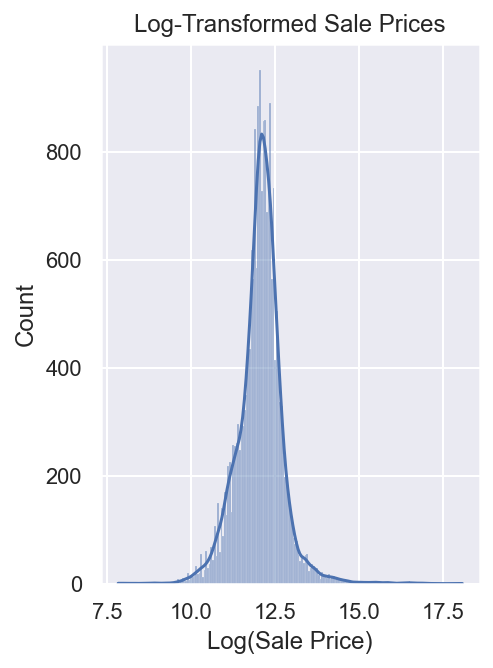

In [99]:
# Log-transformed distribution
# plt.subplot(1, 3, 2)
# log_price = np.log1p(property_sales_data['Sale_price'])
# sns.histplot(log_price, kde=True)
# plt.title('Log-Transformed Sale Price')
# Log-transformed price distribution
plt.subplot(1, 2, 2)
log_sale_price = np.log1p(property_sales_data['Sale_price'])
sns.histplot(log_sale_price, kde=True)
plt.title('Log-Transformed Sale Prices')
plt.xlabel('Log(Sale Price)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [100]:
# Identify numerical features in the dataset
numerical_features = [feat for feat in property_sales_data.columns if property_sales_data[feat].dtypes != 'O']

# Print the number of numerical features found
print('Number of numerical features:', len(numerical_features))

# Display the head of the dataset containing only numerical features
property_sales_data[numerical_features].head()

Number of numerical features: 14


,PropertyID,taxkey,District,nbhd,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_price
0,98461,30131000,9.0,6300.0,1.0,1978.0,NaN,20600.0,6,NaN,0,0,0.0,950000.0
1,98464,30152000,9.0,6202.0,1.0,1982.0,NaN,9688.0,23,NaN,0,0,35719.0,385000.0
2,98508,49980110,9.0,40.0,NaN,NaN,NaN,NaN,0,NaN,0,0,1341648.0,800000.0
3,98519,49993200,9.0,40.0,1.0,1959.0,6.0,1334.0,1,3.0,1,1,83200.0,280000.0
4,98561,50042000,9.0,40.0,1.0,1980.0,10.0,1006.0,1,6.0,1,0,8303.0,233100.0


In [101]:
# Describe the numerical features in the dataset and transpose the description for better readability
property_sales_data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
PropertyID,20008.0,6.193445e+05,3.297438e+05,98461.0,2.110655e+05,8.554890e+05,8.681265e+05,8.814760e+05
taxkey,20008.0,3.509044e+09,1.502020e+09,30131000.0,2.450312e+09,3.250348e+09,4.940802e+09,7.160379e+09
District,20006.0,7.884385e+00,4.272109e+00,1.0,4.000000e+00,8.000000e+00,1.100000e+01,1.500000e+01
nbhd,19951.0,3.339903e+03,1.770248e+03,40.0,1.830000e+03,3.150000e+03,4.620000e+03,2.491000e+04
Stories,19905.0,1.369179e+00,5.402946e-01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,1.900000e+01
Year_Built,19974.0,1.936518e+03,1.093841e+02,0.0,1.922000e+03,1.949000e+03,1.958000e+03,2.022000e+03
Rooms,18944.0,6.882760e+00,3.244466e+00,0.0,5.000000e+00,6.000000e+00,8.000000e+00,6.300000e+01
FinishedSqft,19933.0,2.162681e+03,7.749029e+03,0.0,1.075000e+03,1.377000e+03,1.964000e+03,3.600000e+05
Units,20008.0,1.867503e+00,1.332310e+01,0.0,1.000000e+00,1.000000e+00,2.000000e+00,7.810000e+02
Bdrms,18945.0,3.486461e+00,1.607178e+00,0.0,3.000000e+00,3.000000e+00,4.000000e+00,3.200000e+01


In [102]:
# Initialize empty lists to store statistical information
features_list = []
test_statistics = []
p_values = []
skewness_values = []

# Loop through numerical features to perform normality tests and calculate skewness
for feature in property_sales_data[numerical_features].columns:
    # Perform normality test
    test_statistic, p_value = normaltest(property_sales_data[feature])

    # Append results to respective lists
    features_list.append(feature)
    test_statistics.append(test_statistic)
    p_values.append(p_value)

    # Calculate skewness
    skewness = skew(property_sales_data[feature])
    skewness_values.append(skewness)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Feature': features_list,
                           'Test Statistics': test_statistics,
                           'p-value': p_values,
                           'Skew': skewness_values})
results_df

,Feature,Test Statistics,p-value,Skew
0,PropertyID,102403.178269,0.000000e+00,-0.618182
1,taxkey,1357.024919,2.117303e-295,0.126955
2,District,NaN,NaN,NaN
3,nbhd,NaN,NaN,NaN
4,Stories,NaN,NaN,NaN
5,Year_Built,NaN,NaN,NaN
6,Rooms,NaN,NaN,NaN
7,FinishedSqft,NaN,NaN,NaN
8,Units,61402.530277,0.000000e+00,46.884299
9,Bdrms,NaN,NaN,NaN


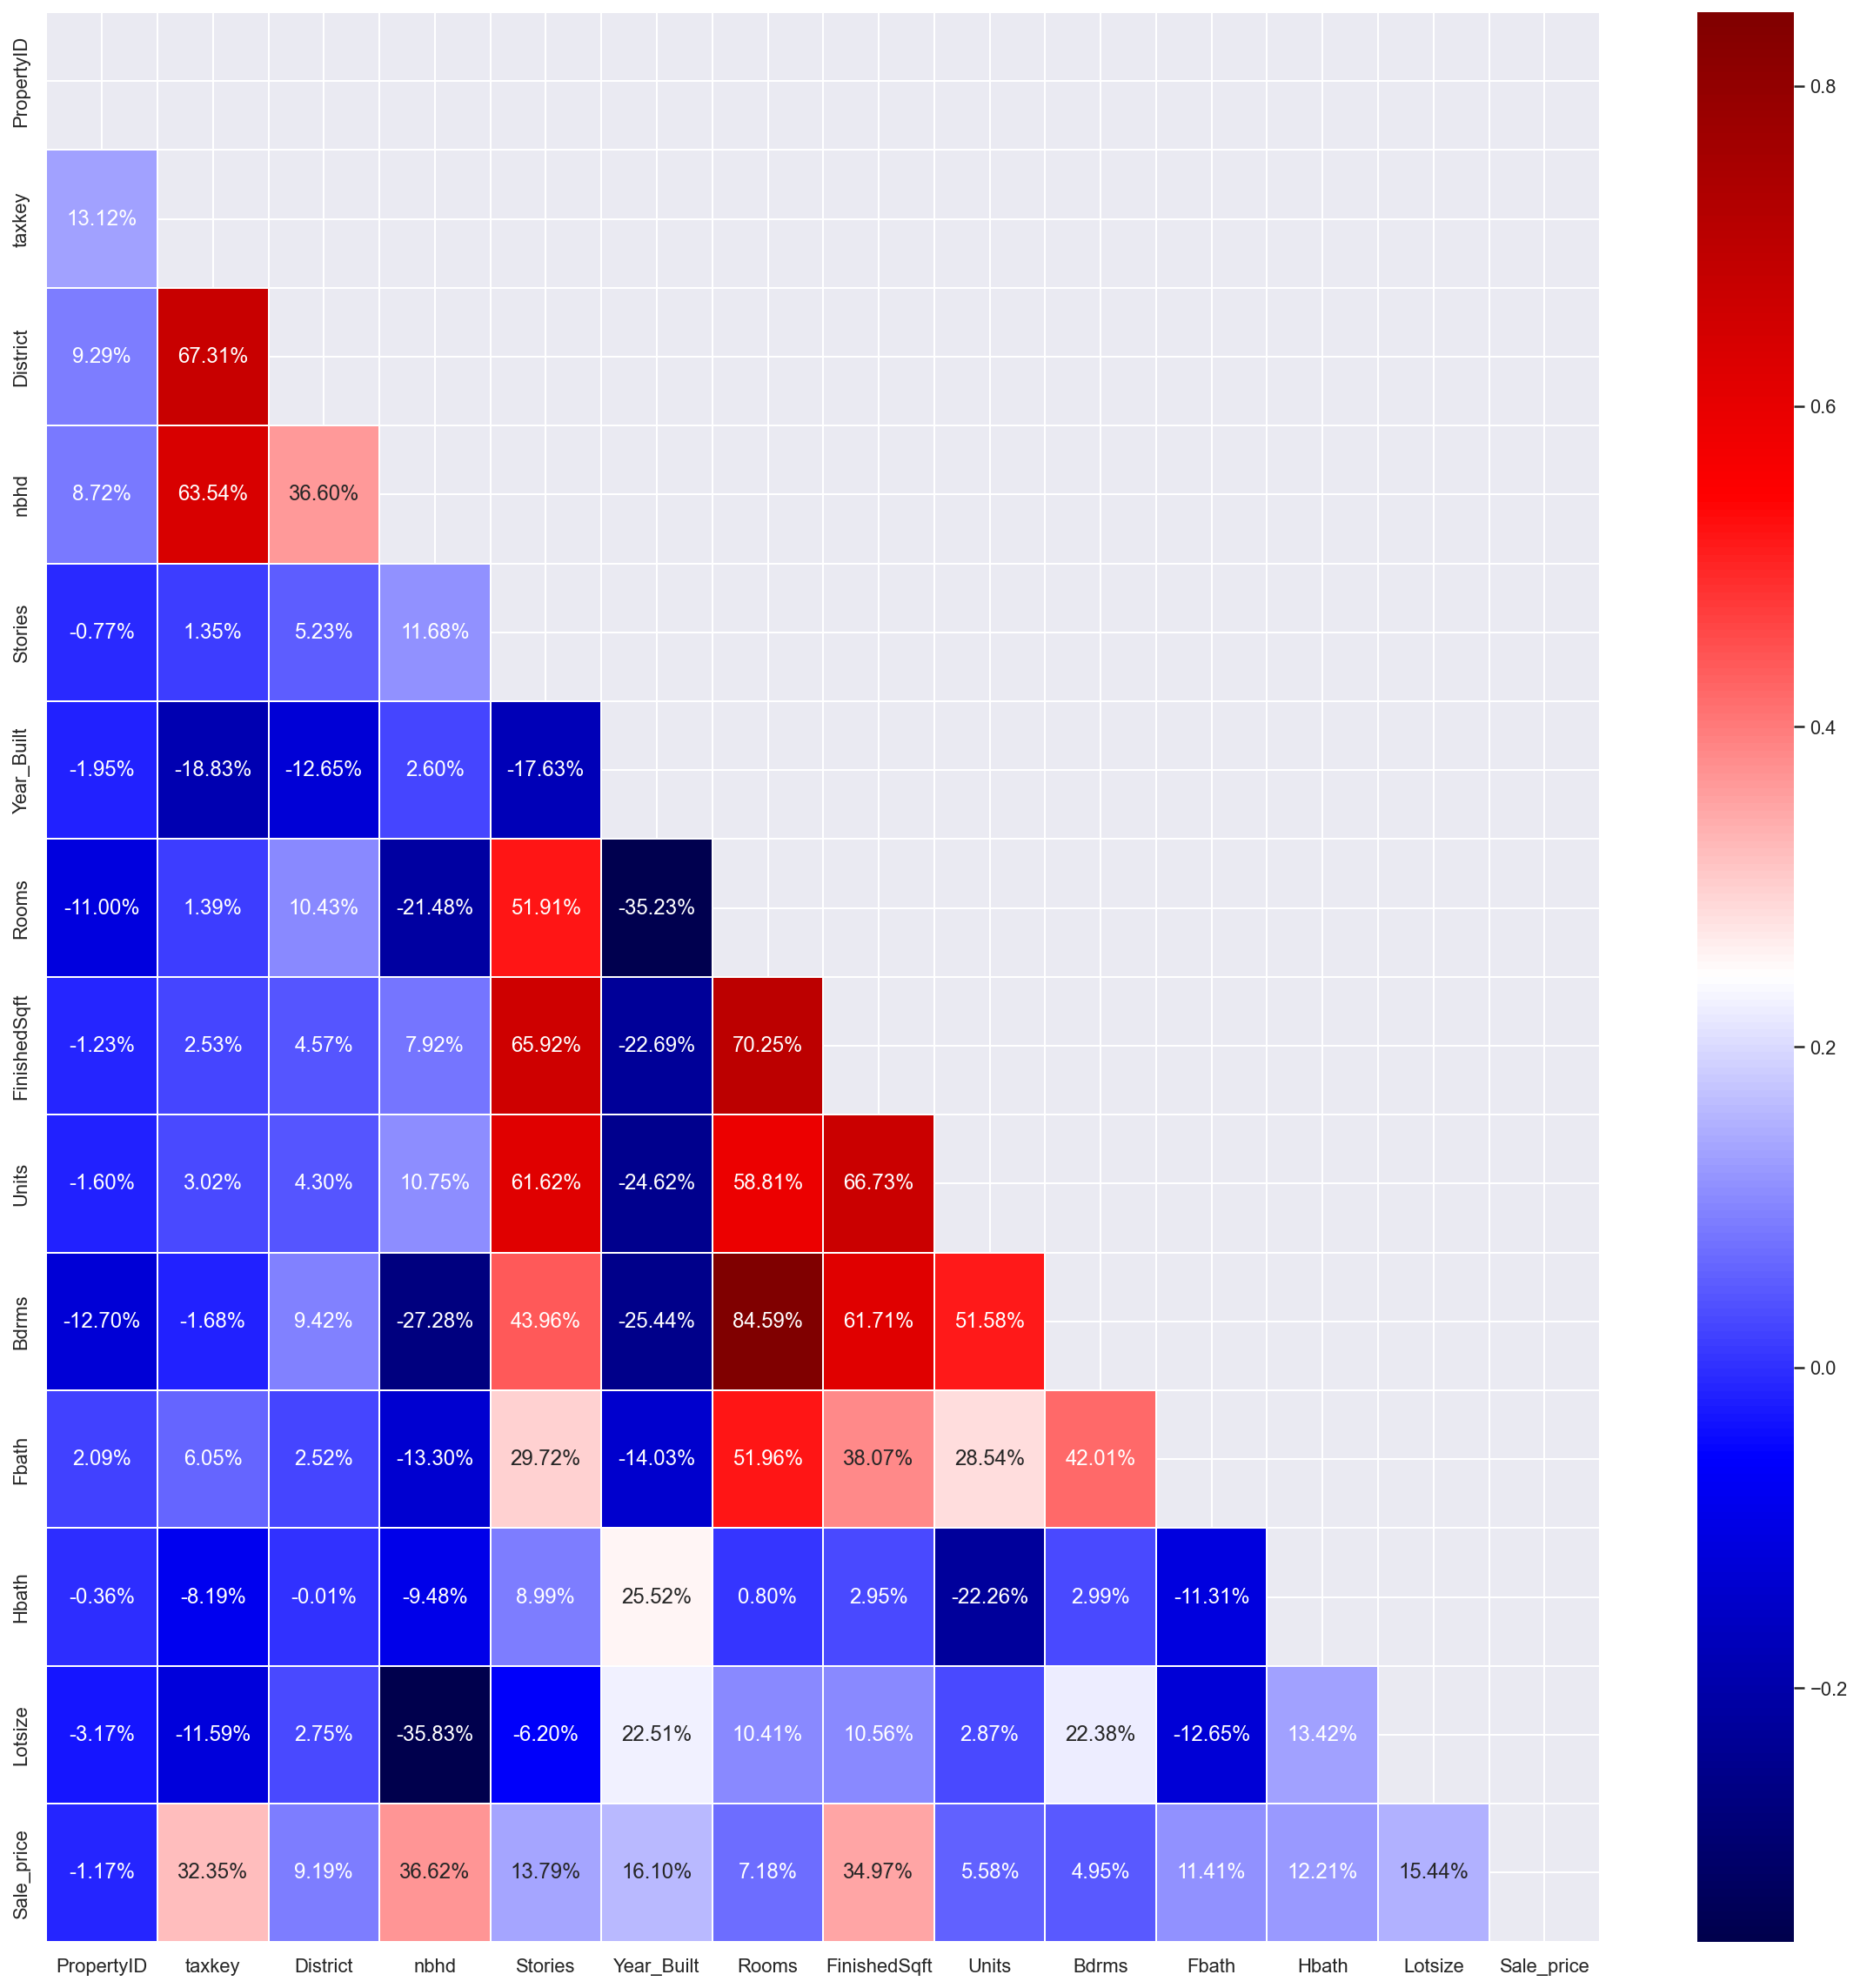

In [103]:
# Compute Spearman correlation matrix for numerical features
correlation_matrix = property_sales_data[numerical_features].corr(method='spearman')

# Set up the plot
plt.figure(figsize=(20, 20))

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)

# Display the plot
plt.show()

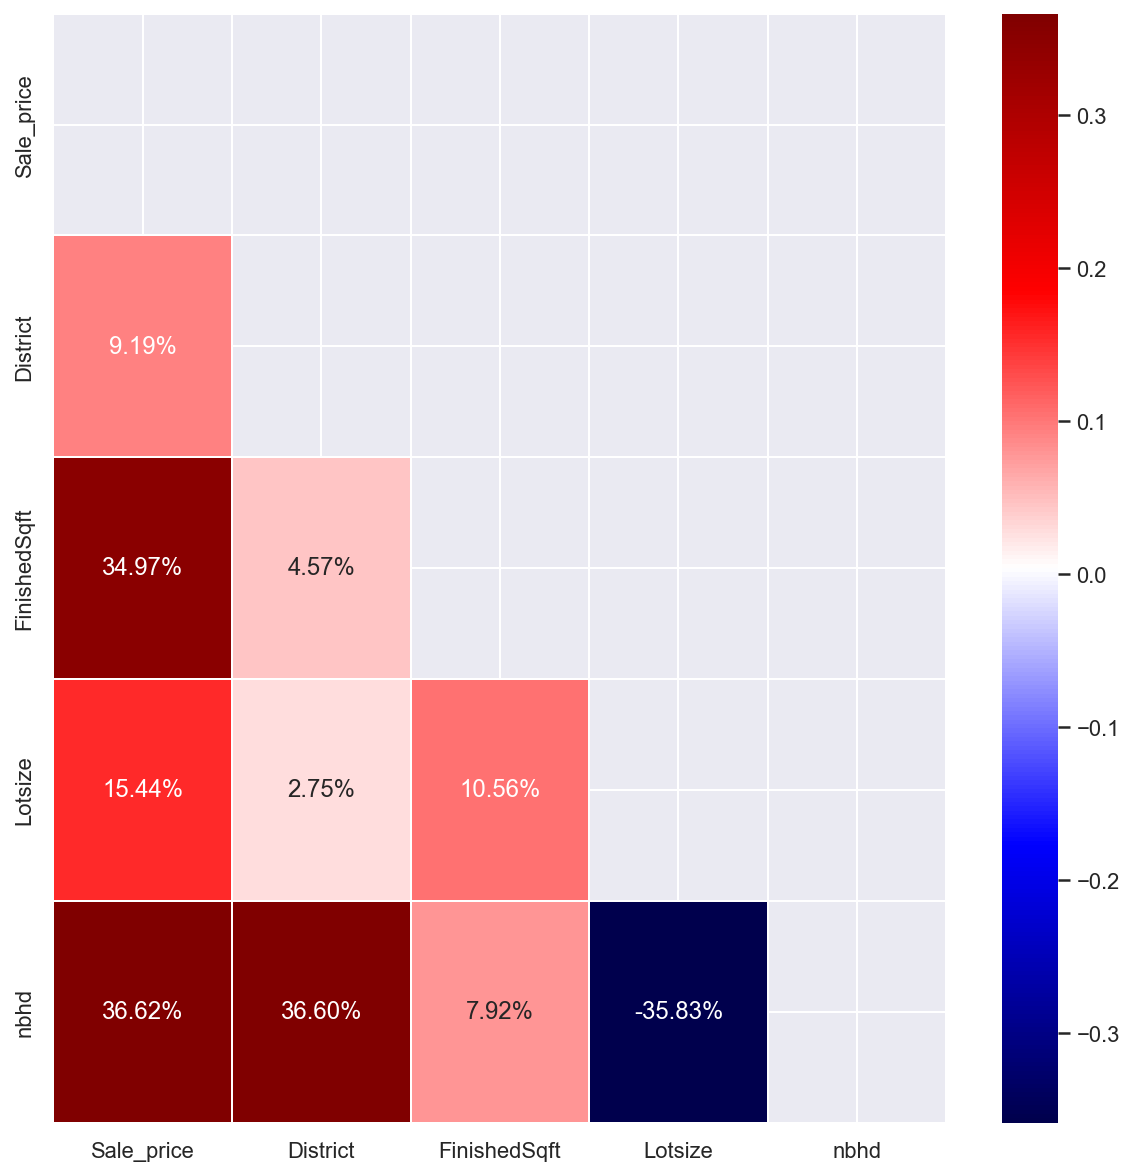

In [105]:
# Compute Spearman correlation matrix for selected columns
correlation_matrix = property_sales_data[['Sale_price', 'District', 'FinishedSqft', 'Lotsize', 'nbhd']].corr(method='spearman')

# Set up the plot
plt.figure(figsize=(10, 10))

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)

# Display the plot
plt.show()

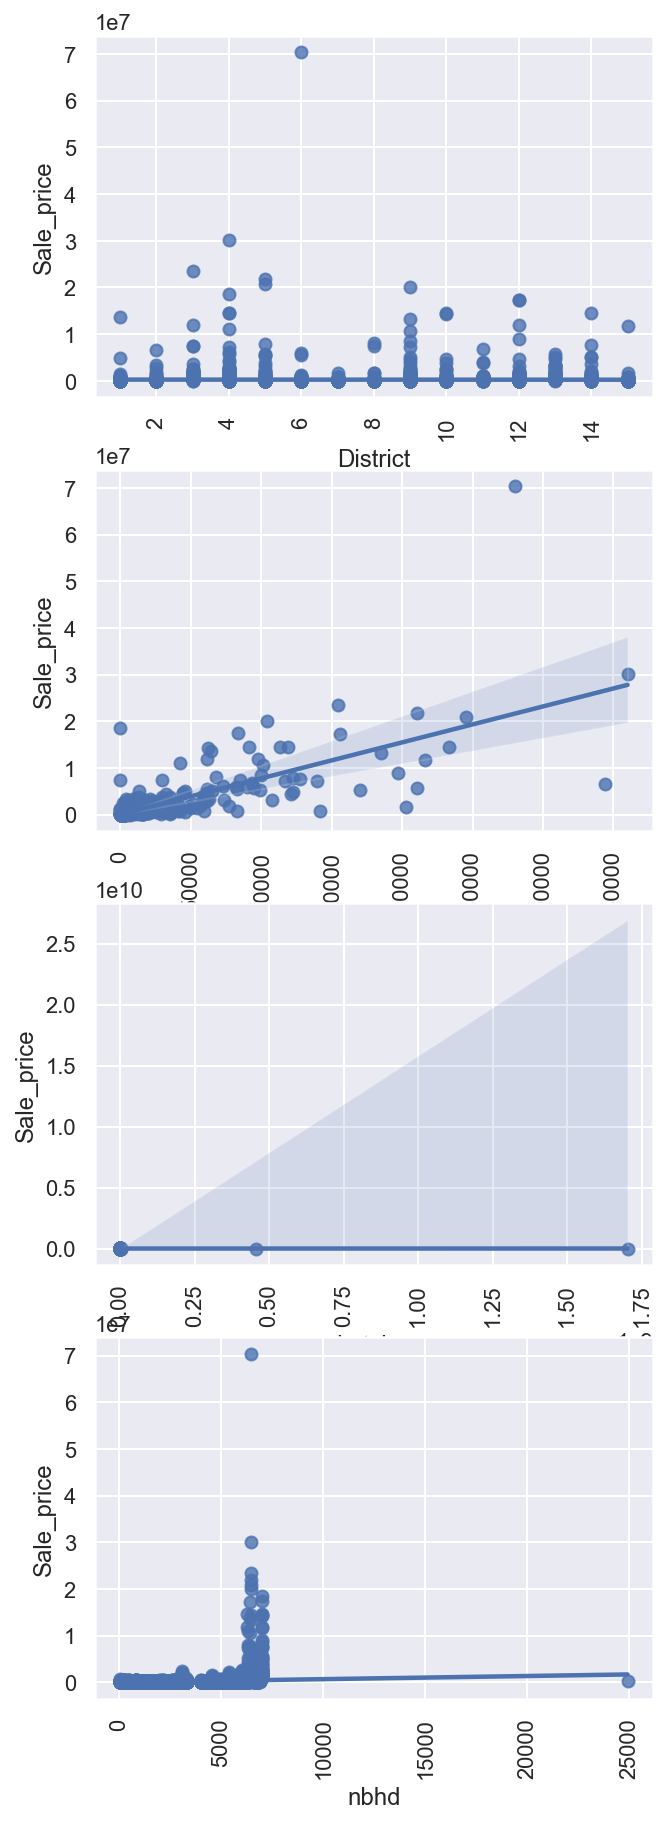

In [107]:
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(5, 15))

# Iterate over variables and corresponding subplots
for variable, subplot in zip(['District', 'FinishedSqft', 'Lotsize', 'nbhd'], axes.flatten()):
    # Plot regression plot for each variable against Sale_price
    sns.regplot(data=property_sales_data, y='Sale_price', x=variable, ax=subplot)

    # Rotate x-axis labels for better readability
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Display the plots
plt.show()

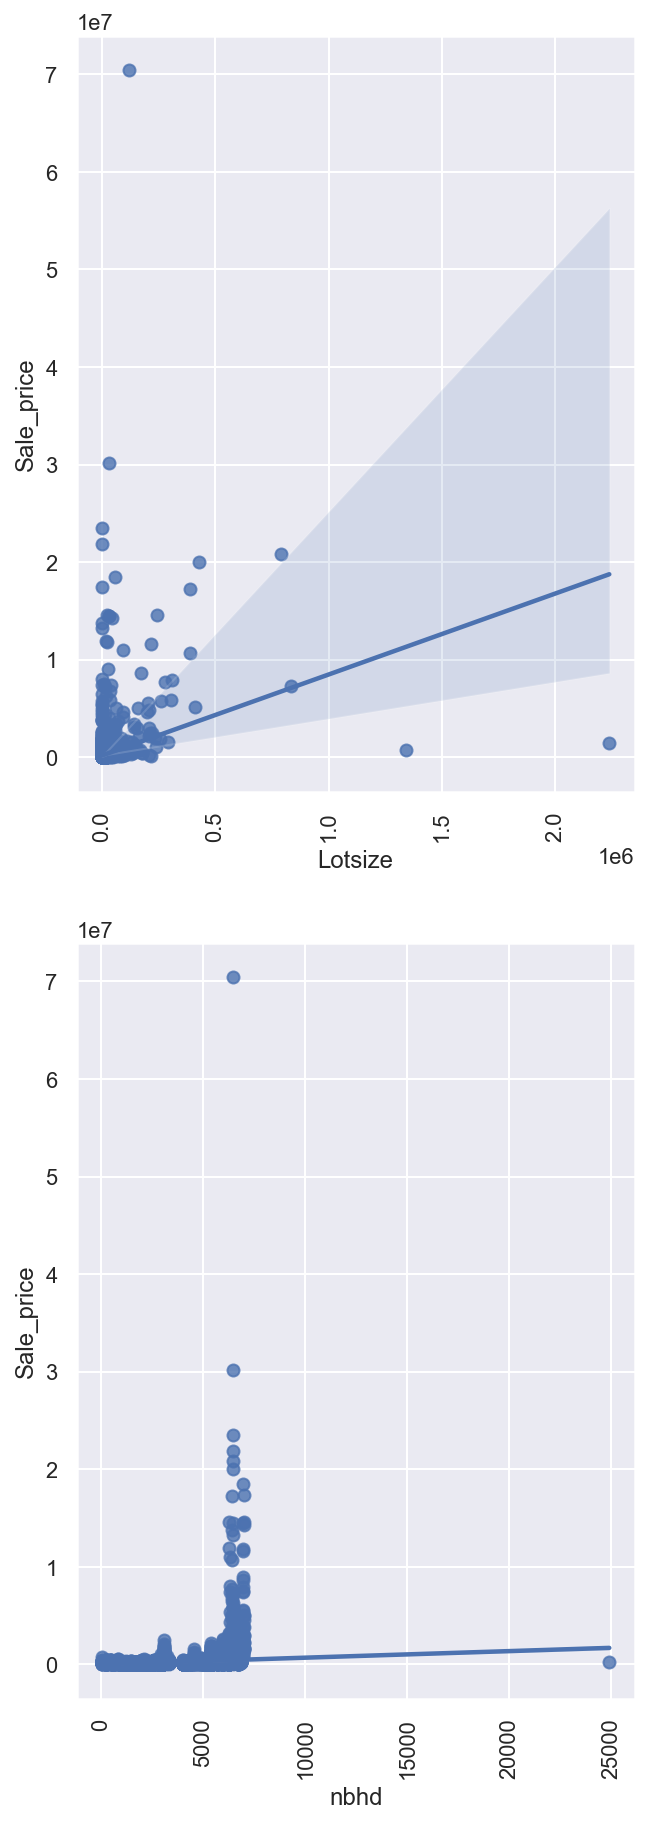

In [108]:
# Filter the dataset for properties with lot size below 4,000,000
filtered_lotsize_data = property_sales_data[property_sales_data['Lotsize'] < 4*1e6]

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(5, 15))

# Iterate over variables and corresponding subplots
for variable, subplot in zip(['Lotsize', 'nbhd'], axes.flatten()):
    # Plot regression plot for each variable against Sale_price
    sns.regplot(data=filtered_lotsize_data, y='Sale_price', x=variable, ax=subplot)

    # Rotate x-axis labels for better readability
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Display the plots
plt.show()

In [109]:
property_sales_data['Lotsize'].describe()

count    2.000700e+04
mean     1.142794e+05
std      1.246685e+07
min      0.000000e+00
25%      3.660000e+03
50%      5.040000e+03
75%      6.750000e+03
max      1.703065e+09
Name: Lotsize, dtype: float64

In [110]:
# Filter the dataset for properties with neighborhood IDs greater than 5000
filtered_nbhd_data = property_sales_data[property_sales_data['nbhd'] > 5000]

# Select specific columns and sort by 'Stories' in descending order
filtered_sorted_data = filtered_nbhd_data[['Address', 'Lotsize', 'nbhd', 'Stories']].sort_values('Stories', ascending=False)

# Display the filtered and sorted data
filtered_sorted_data

,Address,Lotsize,nbhd,Stories
11236,722-740 N BROADWAY,28800.0,6460.0,19.0
17427,324 E WISCONSIN AV,12000.0,6460.0,15.0
4883,222 S 3RD ST,25613.0,6974.0,14.0
331,11200-11270 W PARK PL,0.0,6460.0,12.0
13891,11200-11270 W PARK PL,0.0,6460.0,12.0
...,...,...,...,...
17537,"239 E CHICAGO ST, Unit 205",0.0,5384.0,NaN
17538,"239 E CHICAGO ST, Unit 305",0.0,5384.0,NaN
17539,"239 E CHICAGO ST, Unit 509",0.0,5384.0,NaN
17540,"239 E CHICAGO ST, Unit 708",0.0,5384.0,NaN


In [111]:
# Descriptive statistics for the 'nbhd' column
property_sales_data['nbhd'].describe()

count    19951.000000
mean      3339.902962
std       1770.248192
min         40.000000
25%       1830.000000
50%       3150.000000
75%       4620.000000
max      24910.000000
Name: nbhd, dtype: float64

In [112]:
# Function to bin the area based on certain conditions
def bin_area(x):
    if (x > 0) and (x <= 1.09*1e3):
        return '1'
    elif (x > 1.09*1e3) and (x <= 1.28*1e3):
        return '2'
    elif (x > 1.28*1e3) and (x <= 1.638*1e3):
        return '3'
    elif (x > 1.638*1e3):
        return '4'

In [113]:
# Apply the binning function to create a new column 'livable_bin'
property_sales_data['livable_bin'] = property_sales_data['nbhd'].apply(lambda x: bin_area(x))

In [114]:
# Group the data by 'livable_bin' and calculate descriptive statistics for 'Sale_price'
grouped_sales_stats = property_sales_data.groupby('livable_bin')['Sale_price'].describe()

In [115]:
# Calculate the median 'Sale_price' for each livable_bin group
median_sale_price = grouped_sales_stats['50%'].reset_index()

In [116]:
median_sale_price

,livable_bin,50%
0,1,165200.0
1,2,100000.0
2,3,136500.0
3,4,191900.0


<Axes: xlabel='livable_bin', ylabel='50%'>

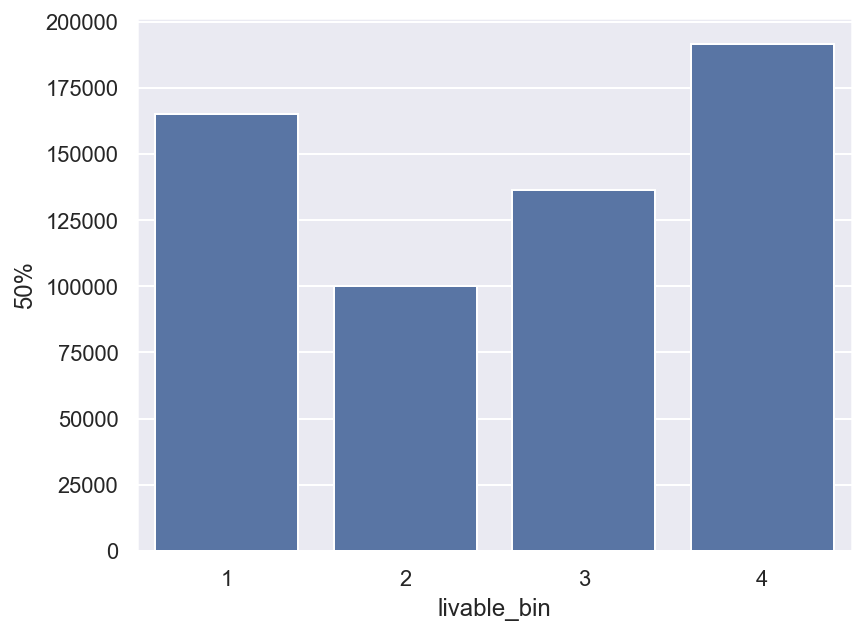

In [117]:
sns.barplot(x='livable_bin', y='50%', data=median_sale_price)

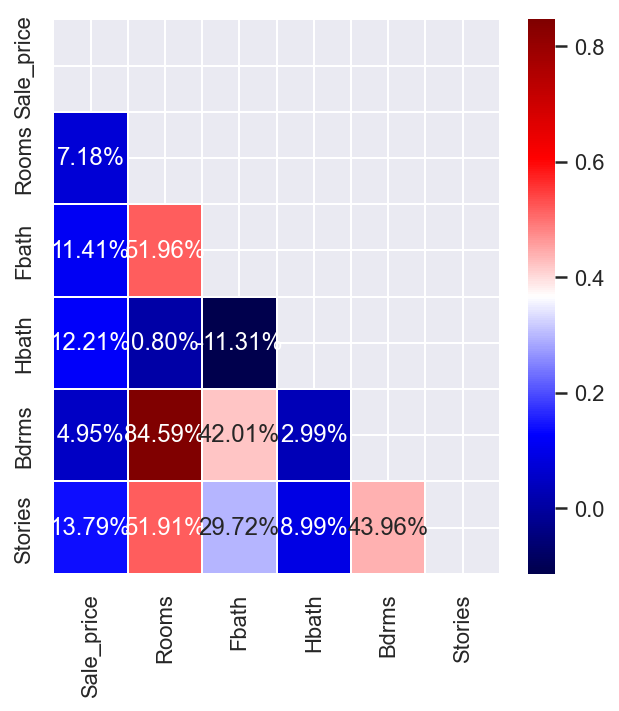

In [118]:
# Compute Spearman correlation matrix for selected columns
correlation_matrix = property_sales_data[['Sale_price', 'Rooms', 'Fbath', 'Hbath', 'Bdrms', 'Stories']].corr(method='spearman')

# Set up the plot
plt.figure(figsize=(5, 5))

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)

# Display the plot
plt.show()

In [119]:
def bin_bedroom(x):
    if (x > 0) and (x <= 2):
        return '0-2'
    elif (x > 2) and (x <= 5):
        return '3-5'
    elif (x > 6) and (x <= 8):
        return '7/8'
    elif x > 8:
        return '>8'

In [120]:
# Apply the binning function to create a new column 'number_bedroom_bin'
property_sales_data['number_bedroom_bin'] = property_sales_data['Bdrms'].apply(lambda x: bin_bedroom(x))

In [121]:
# Group the data by 'number_bedroom_bin' and compute descriptive statistics for 'Lotsize'
bedroom_lotsize_stats = property_sales_data.groupby('number_bedroom_bin')['Lotsize'].describe()

In [122]:
bedroom_lotsize_stats

,count,mean,std,min,25%,50%,75%,max
number_bedroom_bin,,,,,,,,
0-2,4154.0,2946.321136,4209.506662,0.0,0.0,2250.0,5160.0,101059.0
3-5,12571.0,5921.581179,4746.976783,0.0,4305.0,5200.0,6960.0,219978.0
7/8,399.0,5658.513784,4022.300763,0.0,3840.0,4884.0,6165.0,58650.0
>8,189.0,5738.746032,2526.989458,0.0,3750.0,5160.0,7200.0,17160.0


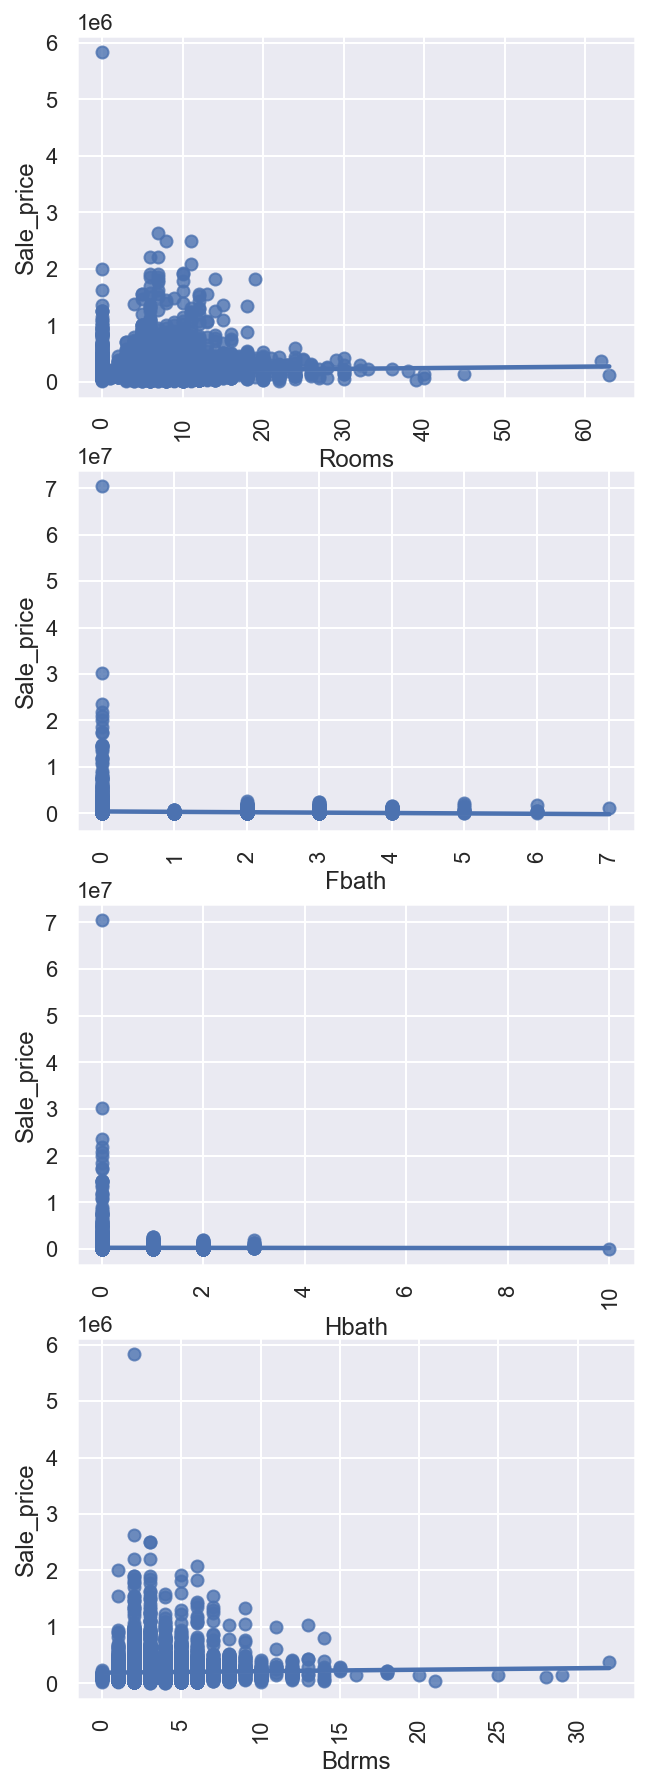

In [123]:
# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(5, 15))

# Iterate over variables and corresponding subplots
for variable, subplot in zip(['Rooms', 'Fbath', 'Hbath', 'Bdrms', 'Stories'], axes.flatten()):
    # Plot regression plot for each variable against Sale_price
    sns.regplot(data=property_sales_data, y='Sale_price', x=variable, ax=subplot)

    # Rotate x-axis labels for better readability
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# Display the plots
plt.show()

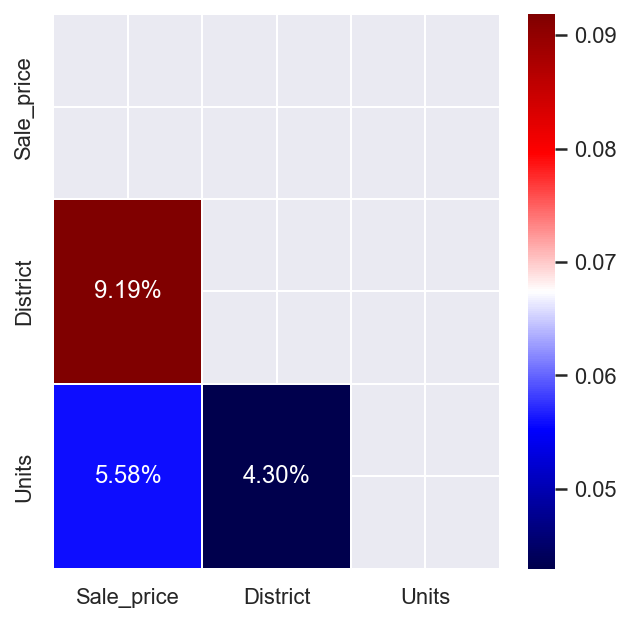

In [126]:
# Overall Condition

# Compute Spearman correlation matrix for selected columns
corr_matrix = property_sales_data[['Sale_price', 'District', 'Units']].corr(method='spearman')

# Set up the plot
plt.figure(figsize=(5, 5))

# Create a mask for the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr_matrix))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='seismic', fmt='.2%', linewidth=1)

# Display the plot
plt.show()

In [127]:
property_sales_data['District'].describe()

count    20006.000000
mean         7.884385
std          4.272109
min          1.000000
25%          4.000000
50%          8.000000
75%         11.000000
max         15.000000
Name: District, dtype: float64

In [128]:
# Define a function to bin the District feature into categories
def bin_condition(x):
    if (x > 0) and (x <= 2):
        return 'Best Condition'
    elif (x > 2) and (x <= 3):
        return 'Above Average'
    elif (x > 3) and (x < 5):
        return 'Average Condition'
    elif (x >= 5) and (x < 6):
        return 'Below Average'
    elif (x >= 6) and (x <= 7):
        return 'Bad Condition'
    else:
        return 'None'

In [129]:
# Apply the binning function to create a new column 'overall_condition_bin'
property_sales_data['overall_condition_bin'] = property_sales_data['District'].apply(lambda x: bin_condition(x))

In [130]:
# Group the data by 'overall_condition_bin' and calculate descriptive statistics for 'Sale_price'
grouped_sale_price_stats = property_sales_data.groupby('overall_condition_bin')['Sale_price'].describe()

In [131]:
# Drop the 'None' category from the descriptive statistics and sort by median
median_sale_price = grouped_sale_price_stats['50%'].reset_index().drop(index=5, axis=0).sort_values('50%')

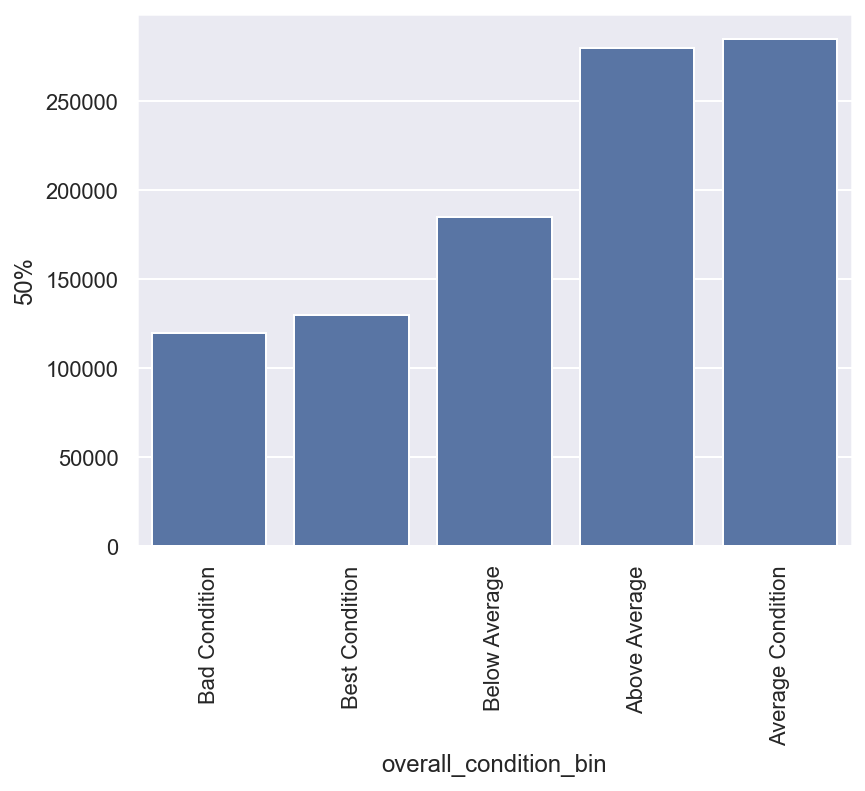

In [132]:
# Visualize the median Sale_price for each category using a bar plot
ax = sns.barplot(data=median_sale_price, x='overall_condition_bin', y='50%')
ax.tick_params(axis='x', rotation=90)
plt.show()

In [133]:
# Categorical Features

In [134]:
# Identify categorical features in the dataset
categorical_features = [feature for feature in property_sales_data.columns if property_sales_data[feature].dtype == 'O']

# Print the number of categorical features found
print('Number of categorical features:', len(categorical_features))

# Display the first few rows of data for the categorical features
property_sales_data[categorical_features].head()

Number of categorical features: 9


,PropType,Address,CondoProject,Style,Extwall,Sale_date,livable_bin,number_bedroom_bin,overall_condition_bin
0,Manufacturing,9434-9446 N 107TH ST,NaN,Service Building,Concrete Block,4/1/2022,4,None,None
1,Commercial,9306-9316 N 107TH ST,NaN,Office Building - 1 Story,Brick,10/7/2022,4,None,None
2,Residential,9327 N SWAN RD,NaN,NaN,NaN,1/7/2022,1,None,None
3,Residential,9411 W COUNTY LINE RD,NaN,Ranch,Aluminum/Vinyl,8/9/2022,1,3-5,None
4,Residential,9322 N JOYCE AV,NaN,Ranch,Aluminum/Vinyl,5/23/2022,1,None,None


In [135]:
# Get descriptive statistics for categorical features
property_sales_data[categorical_features].describe(include=object).T

,count,unique,top,freq
PropType,20008,6,Residential,16280
Address,20004,19018,5815 N 37TH ST,9
CondoProject,2586,279,LANDMARK ON THE LAKE,78
Style,19940,95,Ranch,4361
Extwall,17309,18,Aluminum/Vinyl,9700
Sale_date,20008,920,4/30/2021,94
livable_bin,19951,4,4,15455
number_bedroom_bin,17314,4,3-5,12572
overall_condition_bin,20008,6,None,10308
